In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

## Data Preprocessing

In [12]:
# read dataset

dt = pd.read_csv('data_train.csv')
dt = dt.sample(frac=1)

dt.head()

,tweet,label
1117,gelar acara dukungan warga jateng ingin merasa...,dukungan
1284,pertanyaannya mengapa lautan manusia datang ke...,netral
1422,ketika nasdem memilih aniesbaswedan bukan pili...,dukungan
867,NaN,NaN
1384,dipulau sempu amis akan dijadikan presiden ger...,hujatan


In [13]:
# delete NaN data
dt.dropna(inplace=True)

dt.head()

,tweet,label
1117,gelar acara dukungan warga jateng ingin merasa...,dukungan
1284,pertanyaannya mengapa lautan manusia datang ke...,netral
1422,ketika nasdem memilih aniesbaswedan bukan pili...,dukungan
1384,dipulau sempu amis akan dijadikan presiden ger...,hujatan
555,uuh bahagianya si rektor koplak,hujatan


In [16]:
# update label

dt['label'] = dt['label'].replace({'pujian':'dukungan', 'hujatan':'tidak mendukung'})

dt.head()

,tweet,label
1117,gelar acara dukungan warga jateng ingin merasa...,dukungan
1284,pertanyaannya mengapa lautan manusia datang ke...,netral
1422,ketika nasdem memilih aniesbaswedan bukan pili...,dukungan
1384,dipulau sempu amis akan dijadikan presiden ger...,tidak mendukung
555,uuh bahagianya si rektor koplak,tidak mendukung


## Data Preparation

<AxesSubplot:>

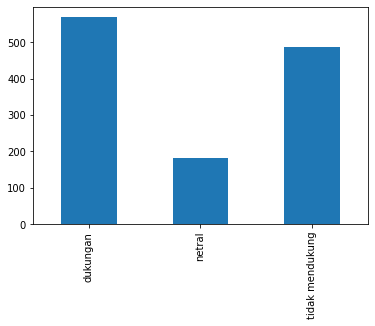

In [18]:
# visualize data

dt['label'].value_counts().sort_index().plot.bar()

In [19]:
# tokenizer text

tokenizer = Tokenizer(num_words=5000, split=" ")

tokenizer.fit_on_texts(dt['tweet'].values)
X = tokenizer.texts_to_sequences(dt['tweet'].values)
X = pad_sequences(X)
print(X)

[[   0    0    0 ...  381    1    2]
 [   0    0    0 ...    5   50 1864]
 [   0    0    0 ...  109    4  159]
 ...
 [   0    0    0 ...    0  457  174]
 [   0    0    0 ... 1119    1   11]
 [   0    0    0 ...  298 1834 4597]]


In [20]:
# get label

y = pd.get_dummies(dt['label']).values
y

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [21]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(988, 51)
(248, 51)


## Training Model

In [22]:
# LSTM Modelling

model = Sequential()
model.add(Embedding(5000, 256))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         1280000   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 lstm (LSTM)                 (None, None, 256)         525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [23]:
# train model

batch_size = 32
epochs = 10

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

# save model into file .h5

model.save('sentiment_analysis.h5')

Epoch 1/10
31/31 - 72s - loss: 1.0018 - accuracy: 0.4717 - 72s/epoch - 2s/step
Epoch 2/10
31/31 - 40s - loss: 0.8322 - accuracy: 0.6721 - 40s/epoch - 1s/step
Epoch 3/10
31/31 - 55s - loss: 0.5039 - accuracy: 0.8087 - 55s/epoch - 2s/step
Epoch 4/10
31/31 - 65s - loss: 0.2254 - accuracy: 0.9231 - 65s/epoch - 2s/step
Epoch 5/10
31/31 - 56s - loss: 0.1060 - accuracy: 0.9615 - 56s/epoch - 2s/step
Epoch 6/10
31/31 - 51s - loss: 0.0500 - accuracy: 0.9838 - 51s/epoch - 2s/step
Epoch 7/10
31/31 - 65s - loss: 0.0312 - accuracy: 0.9899 - 65s/epoch - 2s/step
Epoch 8/10
31/31 - 59s - loss: 0.0282 - accuracy: 0.9939 - 59s/epoch - 2s/step
Epoch 9/10
31/31 - 53s - loss: 0.0283 - accuracy: 0.9909 - 53s/epoch - 2s/step
Epoch 10/10
31/31 - 55s - loss: 0.0167 - accuracy: 0.9939 - 55s/epoch - 2s/step


## Evaluate Model

In [24]:
# evaluate model with data test

score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

8/8 - 5s - loss: 2.0355 - accuracy: 0.6613 - 5s/epoch - 611ms/step
score: 2.04
acc: 0.66


## Predict New Dataset

In [61]:
# read new dataset

data = pd.read_csv('tweet2.csv')

data.head()

,id,tweet
0,1.580000e+18,"@M45Broo_ Cebong benar2 panik luar biasa, ini ..."
1,1.580000e+18,@Relawananies https://t.co/uf5sE0iGLI
2,1.580000e+18,RT @BosPurwa: #IndonesiaMemanggil \n5 Tahun An...
3,1.580000e+18,RT @aLy_Bima: Video ini hanya untuk orang yang...
4,1.580000e+18,"RT @tempodotco: ""Tidak ringan permasalahan di ..."


In [62]:
# data preprocessing

def tweetPrepocessing(text):
  text = text.lower()
  text = re.sub('\n','', text)
  text = re.sub('rt ','', text)
  text = re.sub('#','', text)
  text = re.sub('@\w+(?:\:)\ ','', text)
  text = re.sub(r'(?:\@|http?\://|https?\://|www)\S+','', text)
  text = re.sub('[^a-zA-z0-9\s]','', text)
  text = re.sub('  ',' ', text)

  if text == ' ':
    return None

  return text

data = data.sample(frac=1)
data['tweet'] = data['tweet'].apply(tweetPrepocessing)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace = True)

data.head()

,id,tweet
0,1.580000e+18,zaman anies baswedan rakyat sangat dimudahkans...
1,1.580000e+18,sbyjkpaloh duduk bareng mungkinkah aniesahy se...
2,1.580000e+18,sebenernya same aje sidulu ngahok diuber uber...
3,1.580000e+18,inilah toleransi semu ala anies baswedan menca...
4,1.580000e+18,seluruh kepala suku adat papua dan papua barat...


In [67]:
tokenizer.fit_on_texts(data['tweet'].values)

X_new = tokenizer.texts_to_sequences(data['tweet'].values)
X_new = pad_sequences(X_new)
X_new.shape

(435, 42)

In [68]:
# load model

mymodel = load_model('sentiment_analysis.h5')

In [69]:
# predict data

pred = mymodel.predict(X_new)

14/14 [==============================] - 6s 273ms/step


In [70]:
# labelling

def labelling(array):
  labels = ['dukungan', 'netral', 'tidak mendukung']
  output = []
  for a in array:
    output.append(labels[np.argmax(a)])
  return output

label = labelling(pred)

In [71]:
# add label to data

data['label'] = label

data.head()

,id,tweet,label
0,1.580000e+18,zaman anies baswedan rakyat sangat dimudahkans...,tidak mendukung
1,1.580000e+18,sbyjkpaloh duduk bareng mungkinkah aniesahy se...,tidak mendukung
2,1.580000e+18,sebenernya same aje sidulu ngahok diuber uber...,tidak mendukung
3,1.580000e+18,inilah toleransi semu ala anies baswedan menca...,dukungan
4,1.580000e+18,seluruh kepala suku adat papua dan papua barat...,dukungan


In [72]:
# save to new csv

data.to_csv('tweet2_new.csv', index=False)